In [1]:
%pip install celltypist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 838.8 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 27.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import celltypist
from celltypist import models

In [12]:
import scanpy as sc
import scvi

In [31]:
import anndata as ad

In [13]:
import numpy as np

In [23]:
data1 = sc.read_text("/Users/irisxu/Desktop/BU/Spring/BF751 molecular bio/project/GSE148071/GSM4453576_P1_exp.txt").T
data2 = sc.read_text("/Users/irisxu/Desktop/BU/Spring/BF751 molecular bio/project/GSE148071/GSM4453577_P2_exp.txt").T
data3 = sc.read_text("/Users/irisxu/Desktop/BU/Spring/BF751 molecular bio/project/GSE148071/GSM4453578_P3_exp.txt").T

In [27]:
data3.obs

""
4_TTCAGAATACCA
4_CTTGCGAGCCGA
4_TGTCCGACATTG
4_GGTTTAAACCTG
4_AAGCCTTTGTGG
...
5_GAGAACGCGCTA
5_GCTAGGGCCTAT
5_TAGCCTTGGGGC
5_CAGTTAGCAGAA


In [28]:
data2

AnnData object with n_obs × n_vars = 306 × 29527

In [29]:
data3

AnnData object with n_obs × n_vars = 7835 × 29527

In [32]:
adatas = [data1, data2, data3]
adatas = ad.concat(adatas, join="outer")

In [33]:
adatas

AnnData object with n_obs × n_vars = 13458 × 29527

In [34]:
#transform the data format
from scipy.sparse import csr_matrix
dir = '/Users/irisxu/Desktop/BU/Spring/BF751 molecular bio/project/GSE148071/'
adatas.X = csr_matrix(adatas.X)
adatas.X
#store the data
adatas.write_h5ad(dir+'combined.h5ad')

In [51]:
#read the data
dir = '/Users/irisxu/Desktop/BU/Spring/BF751 molecular bio/project/GSE148071/'
adata = sc.read_h5ad(dir+'combined.h5ad')
adata

AnnData object with n_obs × n_vars = 13458 × 29527

In [52]:
adata.obs

""
1_TAGGCTAAGCCG
1_CCGGCATATTCG
1_TCCGTAGACGTA
1_AAACTACAGTGC
1_GGTGAAAAGAAT
...
5_GAGAACGCGCTA
5_GCTAGGGCCTAT
5_TAGCCTTGGGGC
5_CAGTTAGCAGAA


In [53]:
#get rid of cells with fewer than 200 genes
sc.pp.filter_cells(adata, min_genes=200) 
#get rid of cells with more than 5000 genes
sc.pp.filter_cells(adata, max_genes=5000)
#get rid of genes that are found in fewer than 3 cells
sc.pp.filter_genes(adata, min_cells=3) 

In [54]:
adata

AnnData object with n_obs × n_vars = 13458 × 22931
    obs: 'n_genes'
    var: 'n_cells'

In [55]:
#filter mtDNA > 30%
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True) 
adata = adata[adata.obs.pct_counts_mt<30,:]

In [56]:
adata

View of AnnData object with n_obs × n_vars = 13458 × 22931
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [57]:
#removed cells that have too many expression genes
adata = adata[adata.obs.n_genes_by_counts<2500,:] #The number of genes with at least 1 count in a cell.

In [58]:
adata

View of AnnData object with n_obs × n_vars = 9269 × 22931
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [59]:
adata.obs.head()

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
1_TCCCATTCTCCT,421,421,6872.0,90.0,1.309662
1_TACCATTACTTG,1679,1679,11646.0,1074.0,9.222051
1_TGTCTCGCATCC,1229,1229,11038.0,450.0,4.076826
1_TAGACTACGTAG,1606,1606,9671.0,953.0,9.854203
1_TACGTCGAGAGG,2139,2139,10015.0,1338.0,13.359960


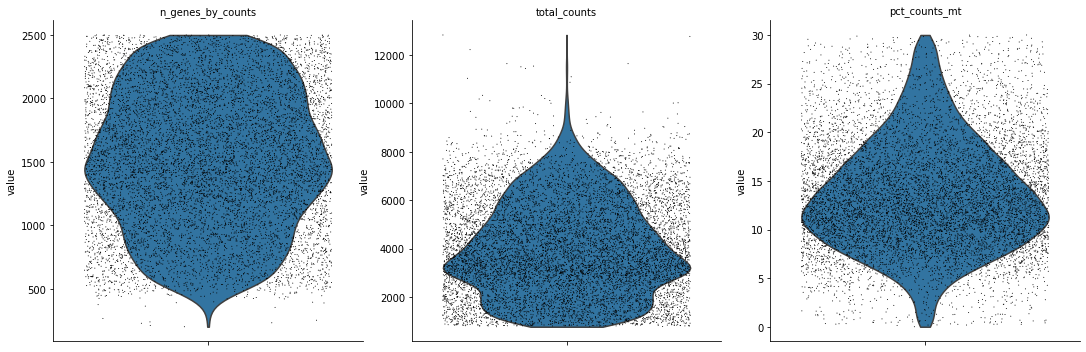

In [60]:
#1.the number of genes expressed in the count matrix; 2.the total counts per cell; 3.the percentage of counts in mitochondrial genes
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

## Normalization and log transformation

In [61]:
#just to see the difference before and after normalization
adata.X.sum(axis = 1)

matrix([[ 6872.],
        [11646.],
        [11038.],
        ...,
        [  801.],
        [  770.],
        [  777.]], dtype=float32)

In [62]:
#normalization + log transformation
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
#copy the raw data
adata.raw = adata

/Users/irisxu/tools/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [63]:
adata.X.sum(axis = 1)

matrix([[ 453.85474],
        [1497.2208 ],
        [1139.097  ],
        ...,
        [1248.7717 ],
        [1131.9023 ],
        [1195.7136 ]], dtype=float32)

In [64]:
import matplotlib.pyplot as plt

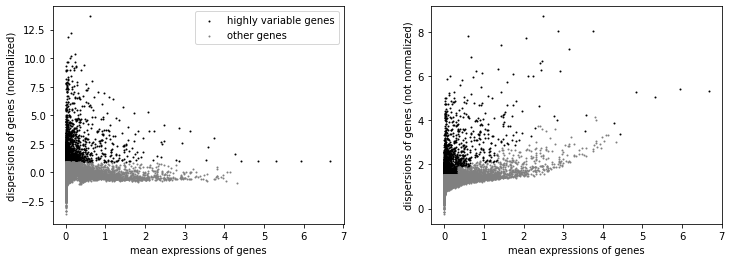

<Figure size 432x288 with 0 Axes>

In [65]:
#identify and visualize high variable gene
sc.pp.highly_variable_genes(adata, n_top_genes = 2000) #original paper select 600
sc.pl.highly_variable_genes(adata)
plt.savefig(dir+"03-highly_variable_genes.png")

In [66]:
adata = adata[:, adata.var.highly_variable]
adata

View of AnnData object with n_obs × n_vars = 9269 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

## PCA and clustering

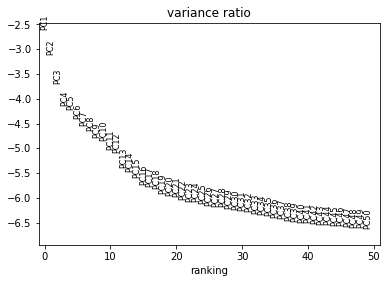

<Figure size 432x288 with 0 Axes>

In [67]:
#remove covariables
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
#scale each gene to unit variance
sc.pp.scale(adata, max_value=10)
#PCA reduction
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50) #Elbow method
plt.savefig(dir+"04-pca_variance.png")

/Users/irisxu/tools/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


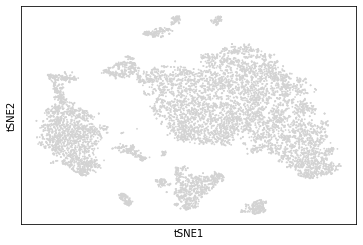

In [68]:
#Compute a neighborhood graph
sc.pp.neighbors(adata, n_pcs=20) 
#t-SNE; set n_pcs = 10
sc.tl.tsne(adata,n_pcs=20) 

#t-SNE plotting
sc.pl.tsne(adata, save='10pc_tsne_plot.png')

In [73]:
#clustering using Leiden graph-clustering method
sc.tl.leiden(adata, resolution=0.4 )
adata.obs['leiden']

1_TCCCATTCTCCT    0
1_TACCATTACTTG    8
1_TGTCTCGCATCC    8
1_TAGACTACGTAG    8
1_TACGTCGAGAGG    6
                 ..
5_GAGAACGCGCTA    0
5_GCTAGGGCCTAT    0
5_TAGCCTTGGGGC    0
5_CAGTTAGCAGAA    5
5_GCAACATTGACG    0
Name: leiden, Length: 9269, dtype: category
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']

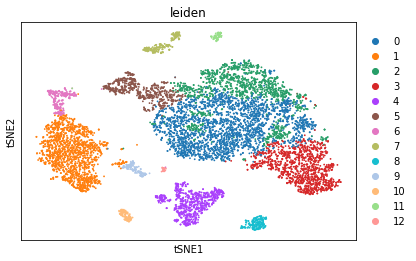

In [74]:
#plot the clusters
sc.pl.tsne(adata, color = 'leiden')

## Differential analysis & find marker gene

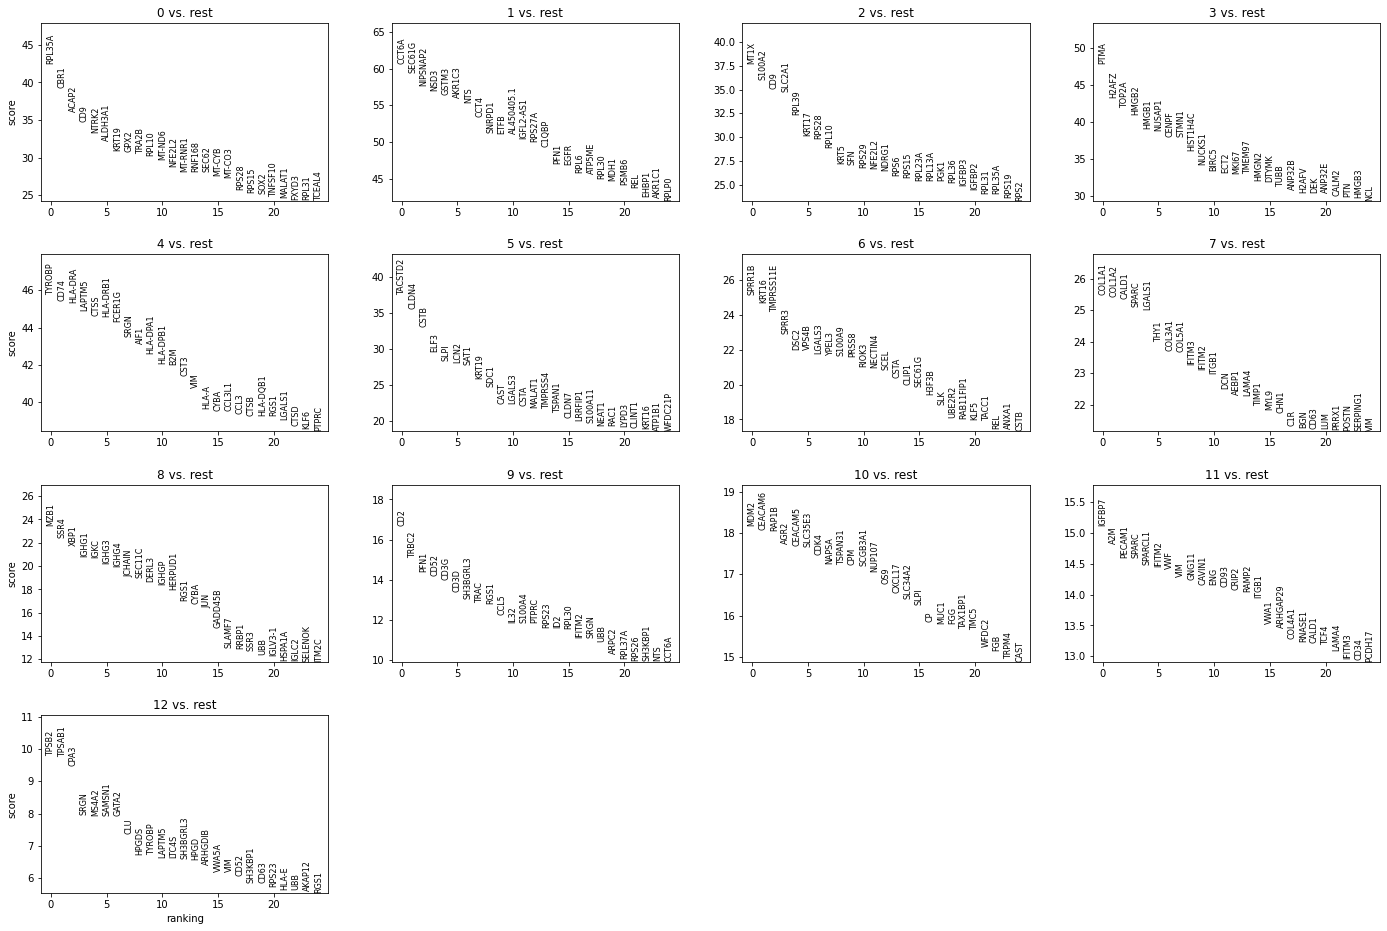

In [75]:
#using wilcoxon method to do the analysis
sc.tl.rank_genes_groups(adata, groupby = 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
sc.settings.verbosity = 2  # reduce the verbosity
#sc.get.rank_genes_groups_df(adata, group="0")